In [1]:
import pandas as pd 
import seaborn as sns 

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.columns 

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.shape

(400, 9)

In [5]:
from sklearn.preprocessing import Binarizer 

In [6]:
bi = Binarizer(threshold = 0.75)

In [7]:
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [9]:
x = df.drop('Chance of Admit ',axis = 1)

In [10]:
y = df['Chance of Admit ']

In [11]:
y = y.astype(int)

<Axes: xlabel='Chance of Admit ', ylabel='count'>

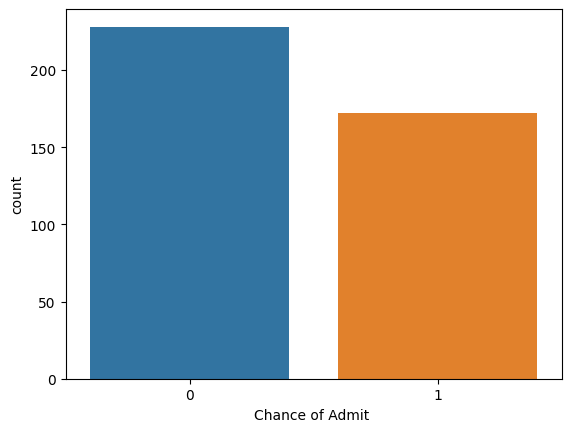

In [12]:
sns.countplot(x=y)

In [13]:
y.value_counts()

Chance of Admit 
0    228
1    172
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split 

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [16]:
x_train.shape

(300, 8)

In [17]:
x_test.shape 

(100, 8)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
classifier = DecisionTreeClassifier(random_state=0)

In [20]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
y_pred = classifier.predict(x_test)

In [22]:
result = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred
})


In [23]:
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score

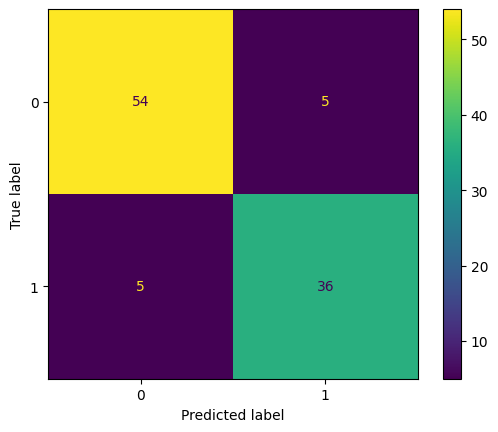

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [25]:
accuracy_score(y_test,y_pred)

0.9

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [28]:
from sklearn.tree import plot_tree

In [30]:
import matplotlib.pyplot as plt 

[Text(0.565625, 0.95, 'x[6] <= 8.655\ngini = 0.492\nsamples = 300\nvalue = [169, 131]'),
 Text(0.365625, 0.85, 'x[5] <= 4.25\ngini = 0.14\nsamples = 159\nvalue = [147, 12]'),
 Text(0.25625, 0.75, 'x[1] <= 319.5\ngini = 0.089\nsamples = 150\nvalue = [143, 7]'),
 Text(0.1625, 0.65, 'x[4] <= 4.75\ngini = 0.056\nsamples = 138\nvalue = [134, 4]'),
 Text(0.1, 0.55, 'x[6] <= 8.51\ngini = 0.043\nsamples = 135\nvalue = [132, 3]'),
 Text(0.05, 0.45, 'x[4] <= 3.25\ngini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.025, 0.35, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(0.075, 0.35, 'x[1] <= 310.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.05, 0.25, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.1, 0.25, 'x[1] <= 311.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.075, 0.15, 'x[6] <= 8.355\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05, 0.05, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1, 0.05, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),


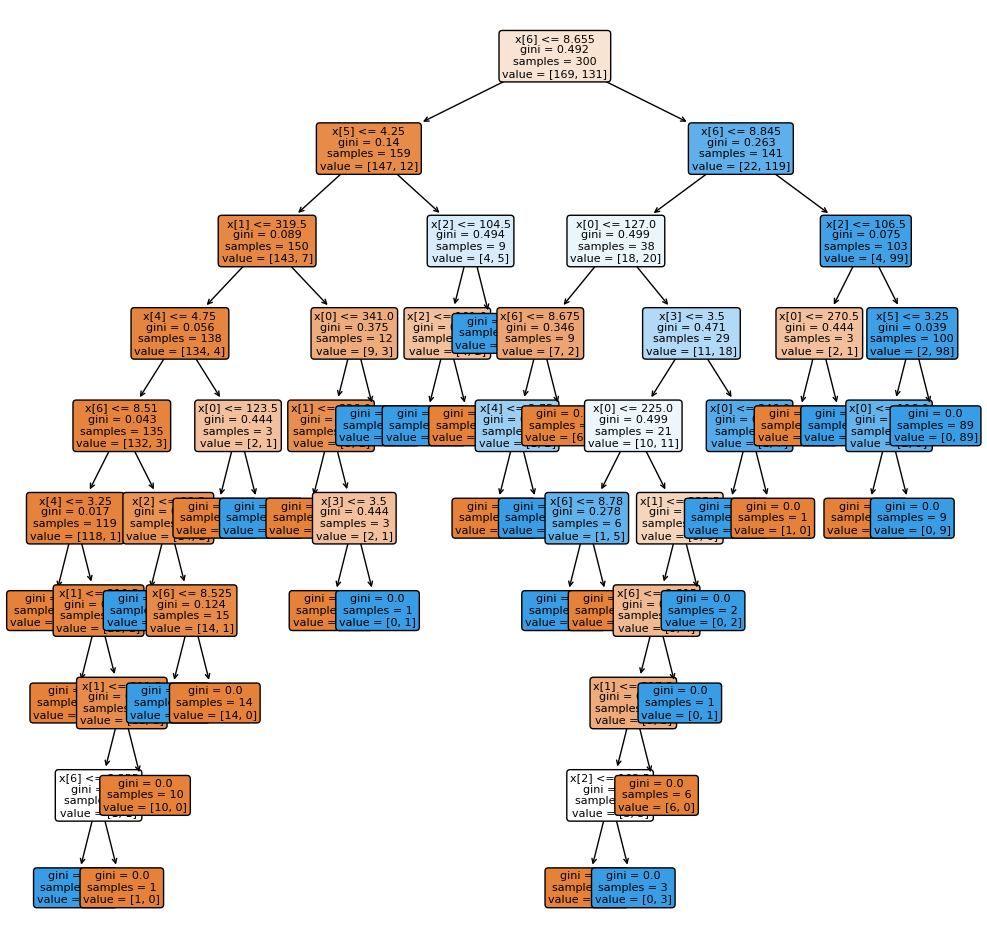

In [31]:
plt.figure(figsize =(12,12))
plot_tree(classifier,fontsize=8,filled=True,rounded = True)